## Task 1: Dataset Generation 
### Logistic Regression
Logistic Regression Assumptions and Characteristics:

- First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

- Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

- Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  Meaning, that the independent variables should not be too highly correlated with each other.

- Fourth, logistic regression assumes linearity of independent variables and log odds of the dependent variable. Although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds of the dependent variable.


- Finally, logistic regression typically requires a large sample size.  A general guideline is that you need at minimum of 10 cases with the least frequent outcome for each independent variable in your model. For example, if you have 5 independent variables and the expected probability of your least frequent outcome is .10, then you would need a minimum sample size of 500 (10*5 / .10).

https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-logistic-regression/

Having the premise of linearity of the independent variables and log odds of the depedndent variable. We create a linear logit function = logit = beta_0 + beta_1 * X1 + beta_2 * X2. Where beta_0 is the intercept (or bias term) and beta_1 and beta_2 are the coefficients (weights) for the predictors X1 and X2.

The logit(P(Y==1)) = log(P(Y==1)/(1-P(Y==1))), therefore we need to make probabilities out of the outcomes of the logit function using the logistic function. Now that we have the probability we can create the output set.




In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Number of data points
n = 10000

# Generate two independent variables X1 and X2 (e.g., random values from normal distribution)
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)

X1[:5], X2[:5]

(array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337]),
 array([-0.67849473, -0.30549946, -0.59738106,  0.11041805,  1.19717853]))

In [3]:
# Calculate log-odds (logit)
beta_0 = 2  # Intercept
beta_1 = 3   # Coefficient for X1
beta_2 = 1   # Coefficient for X2
logit = beta_0 + beta_1 * X1 + beta_2 * X2

# Convert log-odds to probability using the logistic function
P_Y_1 = 1 / (1 + np.exp(-logit))
print(P_Y_1[:20])
# Generate the binary outcome Y
Y = np.random.binomial(1, P_Y_1)
Y[:20]

[0.94330201 0.78240001 0.96596324 0.99874518 0.92377073 0.62867739
 0.99956445 0.97126915 0.43633486 0.98841366 0.82225247 0.81064715
 0.80378005 0.01468997 0.08692559 0.58775182 0.10791802 0.96773764
 0.19171893 0.39117252]


array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1])

         X1        X2    P(Y=1)  Y
0  0.496714 -0.678495  0.943302  1
1 -0.138264 -0.305499  0.782400  0
2  0.647689 -0.597381  0.965963  1
3  1.523030  0.110418  0.998745  1
4 -0.234153  1.197179  0.923771  1


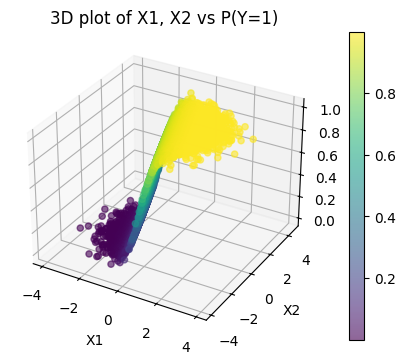

In [4]:
# Create a DataFrame for easier analysis
data = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'P(Y=1)': P_Y_1,
    'Y': Y
})

# Display the first few rows of the dataset
print(data.head())

# Plot the relationship between X1, X2, and P(Y=1) in a 3D plot
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points in 3D
sc = ax.scatter(X1, X2, P_Y_1, c=P_Y_1, cmap='viridis', alpha=0.6)

# Labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('P(Y=1)')

plt.title('3D plot of X1, X2 vs P(Y=1)')

# Add a color bar to show the probability scale
plt.colorbar(sc)

# Show the plot
plt.show()


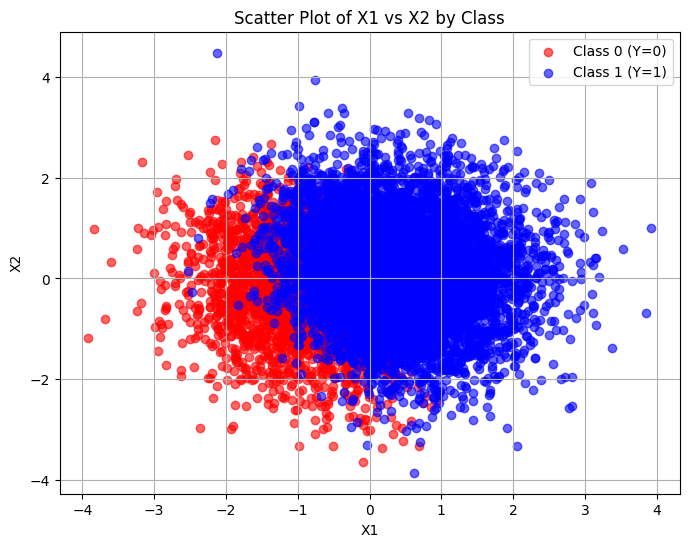

In [5]:
plt.figure(figsize=(8, 6))

# Scatter plot for class 0 (Y=0) in red
plt.scatter(data[data['Y'] == 0]['X1'], data[data['Y'] == 0]['X2'], alpha=0.6, color='red', label='Class 0 (Y=0)')

# Scatter plot for class 1 (Y=1) in blue
plt.scatter(data[data['Y'] == 1]['X1'], data[data['Y'] == 1]['X2'], alpha=0.6, color='blue', label='Class 1 (Y=1)')

# Labels and title
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X1 vs X2 by Class')
plt.legend()  # Add legend to show class labels
plt.grid(True)
plt.show()

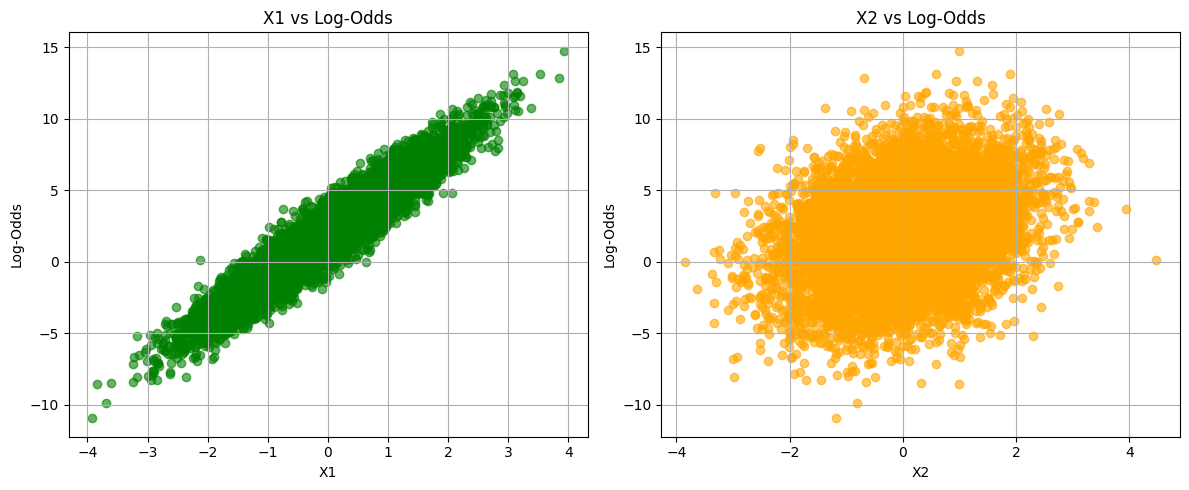

In [6]:
# Plot the relationship between X1 and log-odds
plt.figure(figsize=(12, 5))

# Subplot for X1 vs Log-Odds
plt.subplot(1, 2, 1)
plt.scatter(X1, logit, alpha=0.6, color='green', label='X1 vs Log-Odds')
plt.xlabel('X1')
plt.ylabel('Log-Odds')
plt.title('X1 vs Log-Odds')
plt.grid(True)

# Subplot for X2 vs Log-Odds
plt.subplot(1, 2, 2)
plt.scatter(X2, logit, alpha=0.6, color='orange', label='X2 vs Log-Odds')
plt.xlabel('X2')
plt.ylabel('Log-Odds')
plt.title('X2 vs Log-Odds')
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

### Why This Dataset is Hard to Beat
- Logistic Regression fits perfectly since it assumes a linear decision boundary.

- LDA also works but might be slightly less flexible.

- QDA will struggle since the data does not follow a quadratic boundary.

- Decision Trees (unpruned) may overfit small noise.

- SVM with RBF will introduce unnecessary complexity.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

X = data[['X1', 'X2']].to_numpy() 
y = data['Y'].to_numpy() 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy is: {accuracy * 100:.2f}%")


Test accuracy is: 87.65%


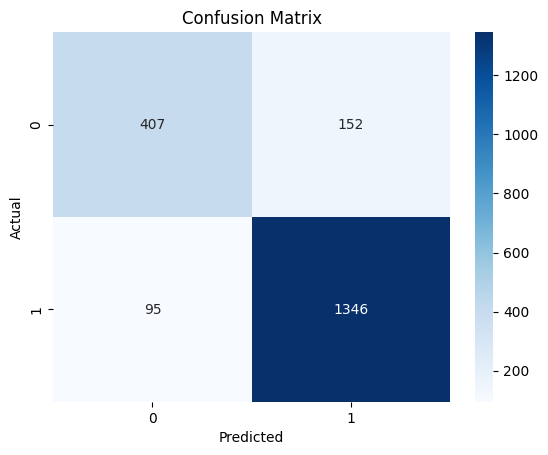

In [8]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Linear Discriminant Analysis - LDA
LDA Assumptions and Characteristics
- The input dataset has a Gaussian distribution, where plotting the data points gives a bell-shaped curve.
- The data set is linearly separable, meaning LDA can draw a straight line or a decision boundary that separates the data points.
- Each class has the same covariance matrix.

https://www.ibm.com/think/topics/linear-discriminant-analysis

The LDA projects the bidemnsional data set onto a lower dimension than a set of coordinates (a line, in this case), find the decision boundary using the means and variance of the 2 classes and then project it back to 2D.

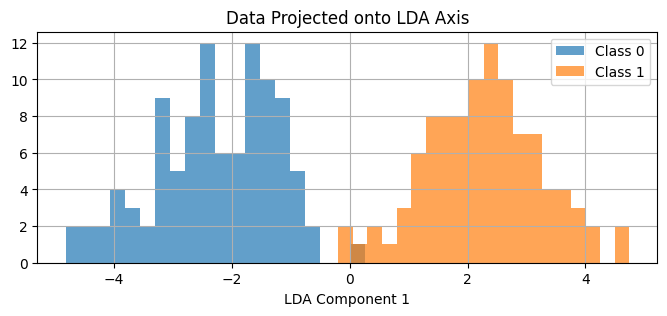

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Set seed
np.random.seed(0)

# Covariance matrix (same for both classes)
cov_matrix = np.array([[1, 0.75],
                       [0.75, 1]])

# Mean vectors for each class
mean_class1 = np.array([2, 2])
mean_class2 = np.array([6, 6])

# Generate data
n_samples = 100
X_class1 = np.random.multivariate_normal(mean_class1, cov_matrix, n_samples)
X_class2 = np.random.multivariate_normal(mean_class2, cov_matrix, n_samples)

# Combine data
X = np.vstack((X_class1, X_class2))
y = np.array([0]*n_samples + [1]*n_samples)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Train LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Project data onto LDA component
X_lda = lda.transform(X)

# Plot 1D projection
plt.figure(figsize=(8, 3))
plt.hist(X_lda[y == 0], label='Class 0', alpha=0.7, bins=20)
plt.hist(X_lda[y == 1], label='Class 1', alpha=0.7, bins=20)
plt.title('Data Projected onto LDA Axis')
plt.xlabel('LDA Component 1')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
from sklearn.metrics import accuracy_score

# Predict labels using the trained LDA model
y_pred = lda.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)

print(f"Accuracy of LDA classifier: {accuracy * 100:.2f}%")

Accuracy of LDA classifier: 98.50%


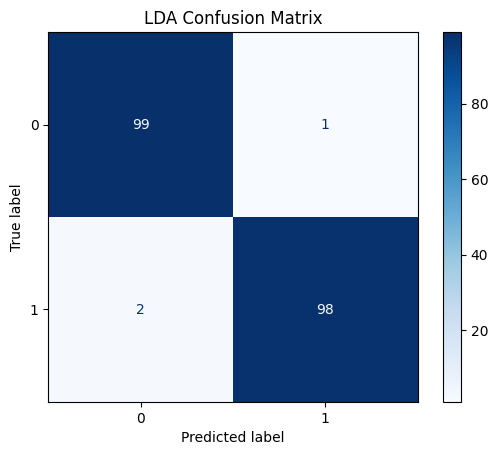

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class labels
y_pred = lda.predict(X)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)
disp.plot(cmap='Blues')
plt.title('LDA Confusion Matrix')
plt.grid(False)
plt.show()

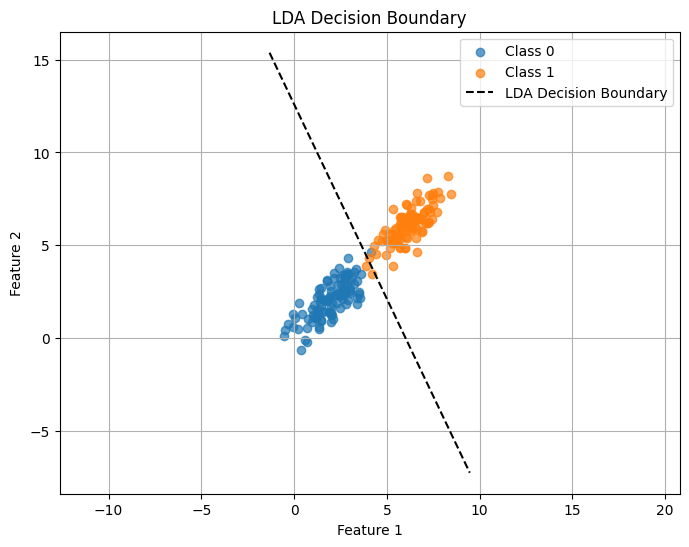

In [51]:
# Decision boundary
slope = -lda.coef_[0][0] / lda.coef_[0][1]
intercept = -lda.intercept_[0] / lda.coef_[0][1]
x_vals = np.linspace(X_test[:,0].min()-1, X[:,0].max()+1, 200)
decision_boundary = slope * x_vals + intercept

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_class1[:, 0], X_class1[:, 1], label='Class 0', alpha=0.7)
plt.scatter(X_class2[:, 0], X_class2[:, 1], label='Class 1', alpha=0.7)
plt.plot(x_vals, decision_boundary, color='black', linestyle='--', label='LDA Decision Boundary')
plt.title('LDA Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


### Why This Dataset is Hard to Beat for LDA
- LDA works best because the data follows a Gaussian distribution, and both classes have equal covariance. This allows LDA to find the optimal linear boundary.

- Logistic Regression also performs well since it assumes a linear decision boundary, similar to LDA, but it does not explicitly model class distributions.

- QDA (Quadratic Discriminant Analysis) struggles because it assumes different covariance structures for each class, while our dataset has equal variances.

- Decision Trees without pruning overfit since they create overly complex boundaries that capture small variations in the data rather than general trends.

- Decision Trees with max depth of 2 perform decently but may not generalize as well as LDA due to their simplicity.

- SVM with a linear kernel performs similarly to Logistic Regression, as it also finds a linear boundary but without modeling class distributions.

- SVM with an RBF kernel unnecessarily complicates the classification by trying to fit a nonlinear boundary when a simple linear one suffices.

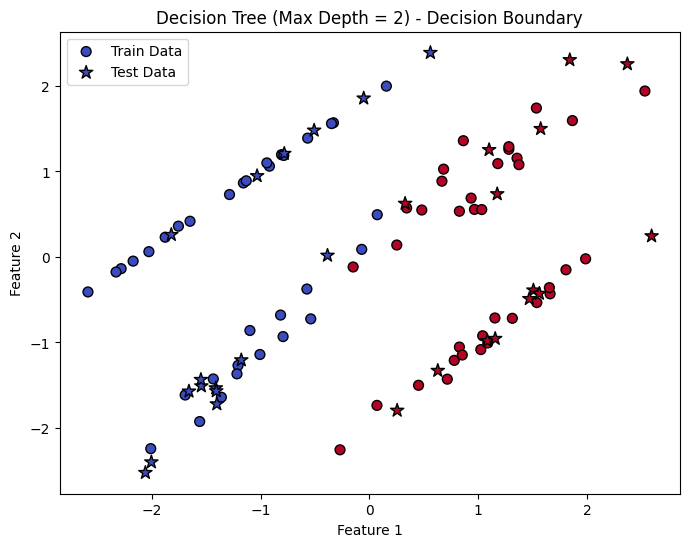

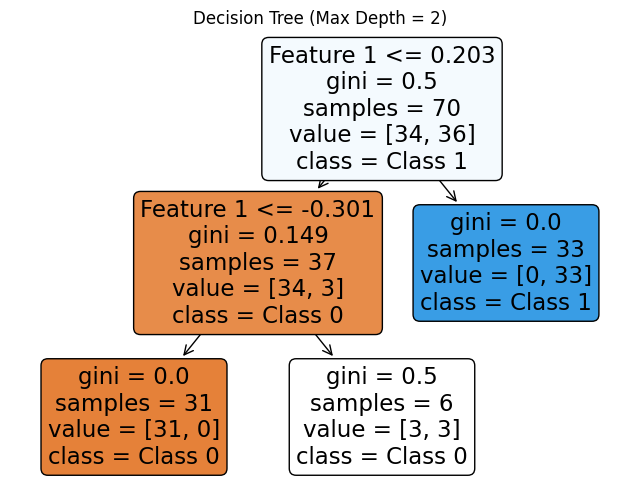

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

# Generate artificial 2D dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier with max_depth=2
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and scatter plot
plt.figure(figsize=(8, 6))
# plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=50, label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', s=100, marker='*', label='Test Data')
plt.title("Decision Tree (Max Depth = 2) - Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Plot the decision tree
plt.figure(figsize=(8, 6))
plot_tree(dt, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"], rounded=True)
plt.title("Decision Tree (Max Depth = 2)")
plt.show()


In [53]:
from sklearn.metrics import accuracy_score

# Predict on training and testing sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Calculate and print accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 95.71%
Testing Accuracy: 96.67%


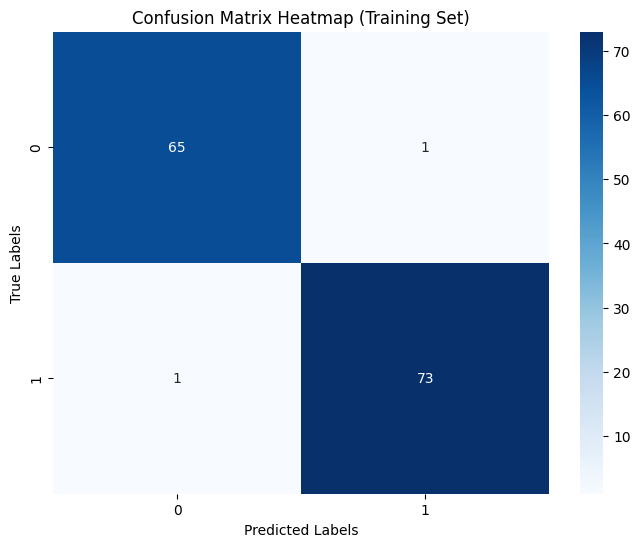

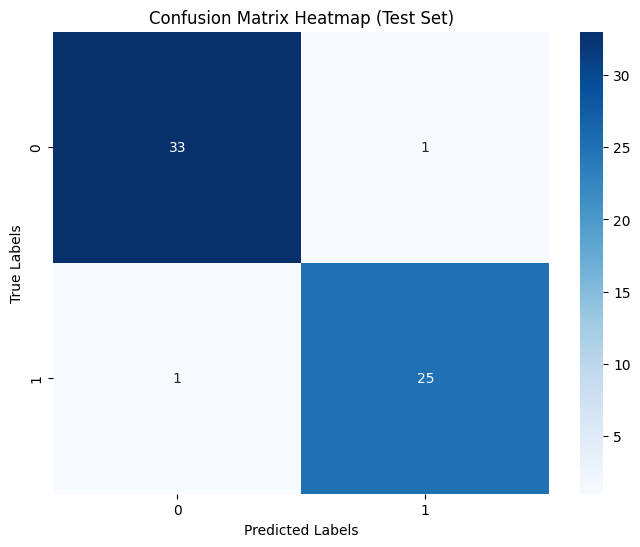

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for training and test sets
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix heatmap for training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.title('Confusion Matrix Heatmap (Training Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot confusion matrix heatmap for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.title('Confusion Matrix Heatmap (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


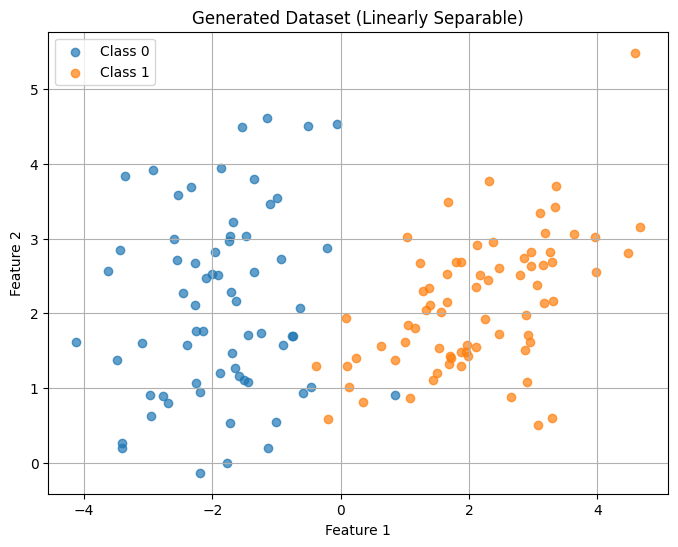

(array([[ 2.37489728e+00,  2.95326370e+00],
        [ 1.27369333e+00,  2.30224218e+00],
        [ 2.96734507e+00,  2.82610109e+00],
        [ 3.25751204e+00,  2.81515089e+00],
        [-1.10191136e+00,  3.46219750e+00],
        [-1.95524140e-01,  5.87477124e-01],
        [-1.72131493e+00,  5.35798732e-01],
        [ 1.71099872e+00,  1.40604731e+00],
        [-2.27509973e+00,  2.11346490e+00],
        [-2.95152462e+00,  6.25314397e-01],
        [-2.00544154e+00,  2.52897328e+00],
        [-1.44758139e+00,  1.71376284e+00],
        [-1.71809799e+00,  2.28471790e+00],
        [-5.81268563e-01,  9.37400958e-01],
        [-3.92452678e-01,  1.29686204e+00],
        [-1.96650639e+00,  2.82145399e+00],
        [ 3.10252081e+00,  3.34684404e+00],
        [-2.60645651e+00,  2.99630075e+00],
        [ 1.02673783e+00,  3.01438813e+00],
        [ 1.98184616e+00,  1.42321507e+00],
        [ 3.34042818e+00,  3.42099601e+00],
        [ 3.17795625e+00,  3.07341223e+00],
        [-1.13866279e+00,  2.020

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate artificial dataset with 2 features, 2 classes, and linear separability
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
                            n_clusters_per_class=1, flip_y=0, class_sep=2.0, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot the generated dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0', alpha=0.7)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1', alpha=0.7)
plt.title("Generated Dataset (Linearly Separable)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Return the dataset for further use
(X_train, X_test, y_train, y_test)


Training Accuracy: 98.57%
Testing Accuracy: 96.67%


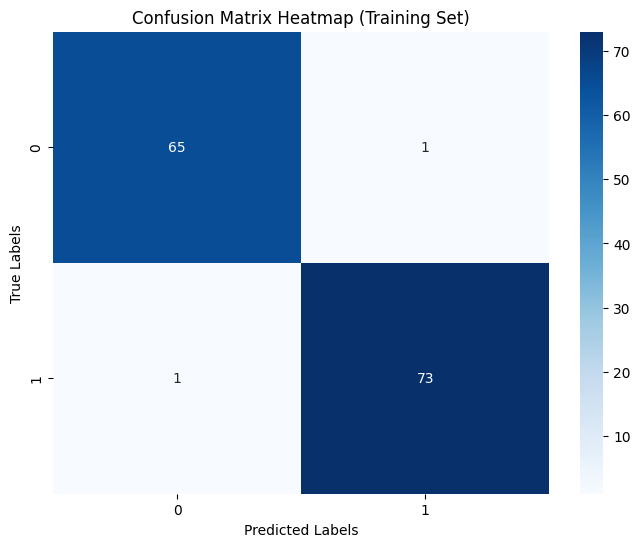

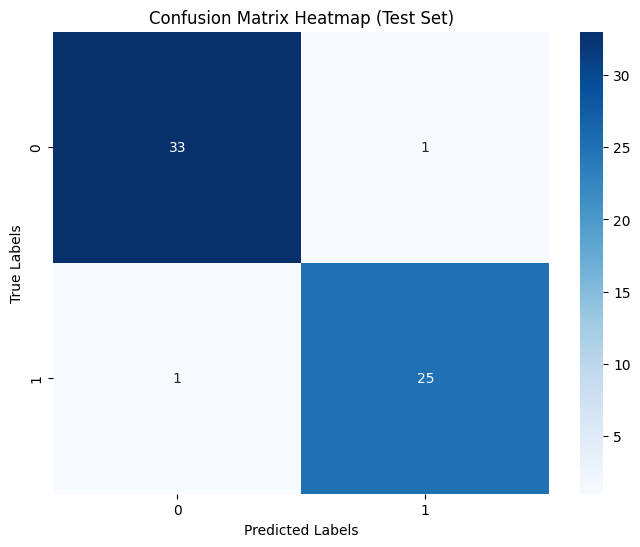

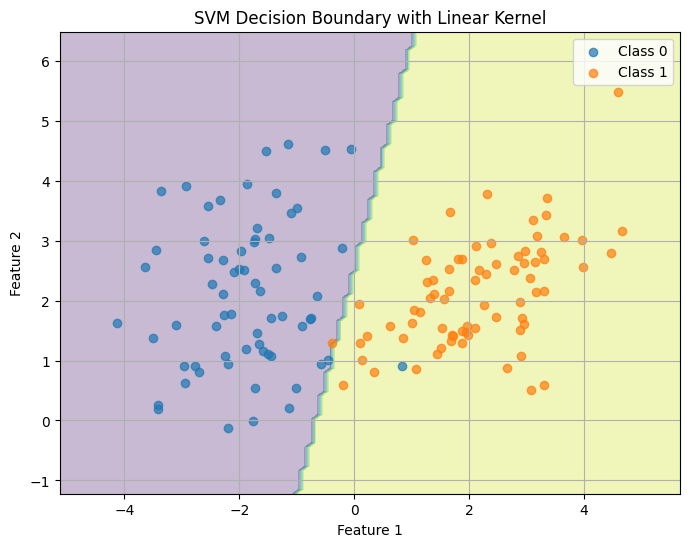

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# Train a linear SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict on training and testing sets
y_train_pred = svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix heatmap for training set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix Heatmap (Training Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot confusion matrix heatmap for test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.title('Confusion Matrix Heatmap (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0', alpha=0.7)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1', alpha=0.7)
plt.title("SVM Decision Boundary with Linear Kernel")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
